# Predicting Terrorist Attacks
## Exploratory Data Analysis

**Author:** Thomas Skowronek

**Date:** March 23, 2018

### Notebook Configuration

In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Configure notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display up to 150 rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

### Load the Datasets
Load the dataset created by the preprocessing notebook.

In [123]:
# Load the preprocessed GTD dataset
gtd_df = pd.read_csv('../data/gtd_preprocessed_95t016.csv', low_memory=False, index_col = 0,
                      na_values=[''])

### Inspect the Structure
The cleansed data frame contains 48 attributes, one of which is used for the data frame index, and 112,251 observations.

In [124]:
# Display a summary of the data frame
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112251 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               112251 non-null int64
imonth              112251 non-null int64
iday                112251 non-null int64
country_txt         112251 non-null object
region_txt          112251 non-null object
provstate           109653 non-null object
city                111805 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         112251 non-null float64
summary             102988 non-null object
attacktype1_txt     112251 non-null object
targtype1_txt       112251 non-null object
targsubtype1_txt    112251 non-null object
corp1               97924 non-null object
target1             112013 non-null object
natlty1_txt         112251 non-null object
gname               112251 non-null object
nperpcap            98849 non-null float64
weaptype1_txt       112251 non-null object
weapsubtype1_

### Code Book
Python interprets the data types differently than the code book provided by START.

|ATTRIBUTE|PYTHON DTYPE|CODE BOOK TYPE|DEFINITION|
|:----------------|:--------|:------------|:---------------------------------------|
|eventid|int64|Numeric|12-digit Event ID system. First 8 numbers - date recorded "yyyymmdd". Last 4 numbers - sequential case number for the given day|
|iyear|int64|Numeric|The year in which the incident occurred|
|imonth|int64|Numeric|The month in which the incident occurred.  When the exact month of the incident is unknown, this will be recorded as "0".|
|iday|int64|Numeric|The numeric day of the month on which the incident occurred.  When the exact day of the incident is unknown, the field is recorded as "0".|
|extended|object|Categorical|The duration of an incident extended more than 24 hours.  1 = YES, 0 = NO|
|country_txt|object|Categorical|Identifies the country or location where the incident occurred.  When incident occurred cannot be identified, it is coded as "Unknown.|
|region_txt|object|Categorical|Identifies the region in which the incident occurred, and divided into 1 of 12 categories|
|provstate|object|Text|The name (at the time of event) of the 1st order subnational administrative region in which the event occurs|
|city|object|Text|The name of the city, village, or town in which the incident occurred.  If unknown, then this field contains the smallest administrative area below provstate|
|latitude|float64|Numeric|The latitude (based on WGS1984 standards) of the city in which the event occurred|
|longitude|float64|Numeric|The longitude (based on WGS1984 standards) of the city in which the event occurred.|
|specificity|float64|Categorical|Identifies the geospatial resolution of the latitude and longitude fields. 1 to 5|
|vicinity|object|Categorical|1 = YES, The incident occurred in the immediate vicinity of the city in question.  0 = NO, The incident in the city itself.|
|summary|object|Text|A brief narrative summary of the incident, noting the "when, where, who, what, how, and why.|
|crit1|object|Categorical|The violent act must be aimed at attaining a political, economic, religious, or social goal. 1 = YES, 0 = NO|
|crit2|object|Categorical|There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience than the immediate victims. 1 = YES, 0 = NO|
|crit3|object|Categorical|The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants.  1 = YES, 0 = NO|
|doubtterr|object|Categorical|There is doubt as to whether the incident is an act of terrorism.  1 = YES, 0 = NO|
|multiple|object|Categorical|Denote that the particular attack was part of a "multiple" incident.  1 = YES, 0 = NO|
|success|object|Categorical|A successful attack depends on the type of attack. The key question is whether or not the attack type took place.  1 = YES, 0 = NO|
|suicide|object|Categorical|Coded "Yes" in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 1 = YES, 0 = NO|
|attacktype1_txt|object|Categorical|The general method of attack and often reflects the broad class of tactics used. 9 categories|
|targtype1_txt|object|Categorical|The general type of target/victim.  22 categories|
|targsubtype1_txt|object|Categorical|The more specific target category and provides the next level of designation for each target type. If a target subtype is not applicable this variable is left blank|
|corp1|object|Text|The corporate entity or government agency that was targeted|
|target1|object|Text|The specific person, building, installation, etc., that was targeted and/or victimized|
|natlty1_txt|object|Categorical|The nationality of the target that was attacked.  For hijacking incidents, the nationality of the plane is recorded|
|gname|object|Text|The name of the group that carried out the attack|
|guncertain1|object|Categorical|Indicates whether or not the information reported about the Perpetrator Group Name(s) is based on speculation or dubious claims of responsibility.  1 = YES, 0 = NO|
|individual|object|Categorical|Indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 1 = YES, 0 = NO|
|nperpcap|float64|Numeric|The number of perpetrators taken into custody. "-99" or "Unknown" appears when there is evidence of captured, but the number is not reported|
|claimed|object|Categorical|Indicates whether a group or person(s) claimed responsibility for the attack.  1 = YES, 0 = NO|
|weaptype1_txt|object|Categorical|Records the general type of weapon used in the incident.  Up to four weapon types are recorded for each incident|
|weapsubtype1_txt|object|Categorical|A more specific value for most of the Weapon Types identified|
|nkill|float64|Numeric|Total confirmed fatalities for the incident|
|nkillus|float64|Numeric|The number of U.S. citizens who died as a result of the incident|
|nkillter|float64|Numeric|Limited to only perpetrator fatalities|
|nwound|float64|Numeric|The number of confirmed non-fatal injuries to both perpetrators and victims|
|nwoundus|float64|Numeric|The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims|
|nwoundte|float64|Numeric|Number of Perpetrators Injured|
|property|object|Categorical|There is evidence of property damage from the incident.  1 = YES, 0 = NO|
|ishostkid|object|Categorical|Whether or not the victims were taken hostage or kidnapped during an incident. 1 = YES, 0 = NO|
|scite1|object|Text|Cites the first source that was used to compile information on the specific incident|
|dbsource|object|Text|Identifies the original data collection effort in which each event was recorded|
|INT_LOG|object|Categorical|It indicates whether a perpetrator group crossed a border to carry out an attack (logistically international).  1 = YES, 0 = NO, -9=UNKNOWN|
|INT_IDEO|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (ideologically international). 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_MISC|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (not clear if logistically or ideologically international) 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_ANY|object|Categorical|The attack was international on any of the dimensions.  1 = YES, 0 = NO, -9=UNKNOWN|


**NOTE 1:** *For categorical variables, -9 was replaced with -1 per a recommendation from Dr. George at Regis University.*

**NOTE 2:** *For attributes containing 1, 0, and -1, they were replaced with a labeled version of the attribute and can be identified by a `_txt` suffix in the data frame.*

### Convert Attributes to Categorical
Convert a subset of the data frame attributes to categorical to align with the GTD code book. Converting attributes to categorical reduces memory requirement and signals to other libraries to treat the attribute accordingly (Pandas, n.d.).  For the GTD data frame, it results in a percent decrease of 36.5%.

In [125]:
# List of attributes that are categorical
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt', 
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt', 
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt', 
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')
    
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112251 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               112251 non-null int64
imonth              112251 non-null int64
iday                112251 non-null int64
country_txt         112251 non-null category
region_txt          112251 non-null category
provstate           109653 non-null object
city                111805 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         112251 non-null category
summary             102988 non-null object
attacktype1_txt     112251 non-null category
targtype1_txt       112251 non-null category
targsubtype1_txt    112251 non-null category
corp1               97924 non-null object
target1             112013 non-null object
natlty1_txt         112251 non-null category
gname               112251 non-null object
nperpcap            98849 non-null float64
weaptype1_txt       112251 non-null categor

### Summary Statistics
View summary statistics for the numerical attributes.

In [126]:
gtd_df[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
        'nwoundus', 'nwoundte']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nperpcap,98849.0,0.126172,2.189526,0.0,0.0,0.0,0.0,406.0
nkill,108475.0,2.537663,12.021238,0.0,0.0,1.0,2.0,1500.0
nkillus,102809.0,0.042701,5.980211,0.0,0.0,0.0,0.0,1358.0
nkillter,100753.0,0.476978,4.224531,0.0,0.0,0.0,0.0,500.0
nwound,104695.0,3.899126,41.477467,0.0,0.0,0.0,3.0,7366.0
nwoundus,102609.0,0.025982,2.225410,0.0,0.0,0.0,0.0,650.0
nwoundte,98979.0,0.098142,1.467224,0.0,0.0,0.0,0.0,200.0


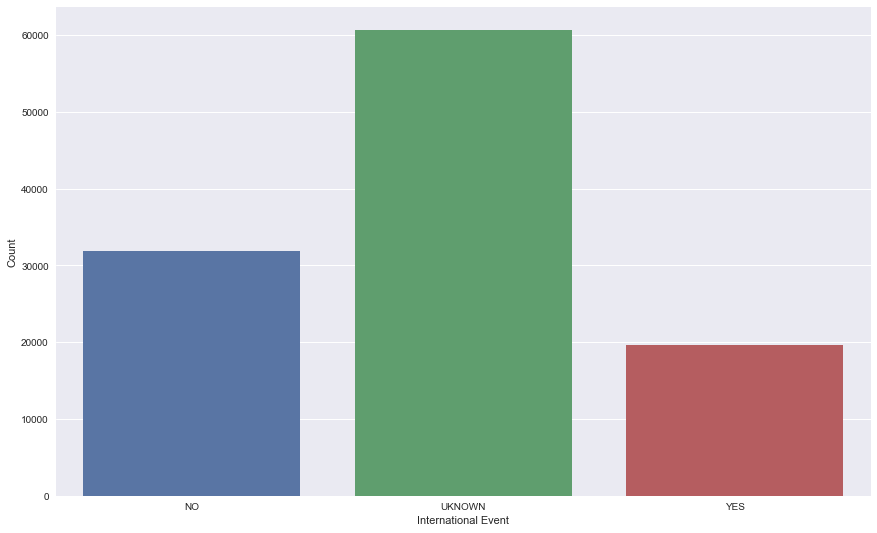

In [127]:
_ = sns.countplot(x = 'INT_ANY_txt', data=gtd_df)
_ = plt.xlabel('International Event')
_ = plt.ylabel('Count')
plt.show()

### References
Pandas. (n.d.). Categorical data. Retrieved from https://pandas.pydata.org/pandas-docs/stable/categorical.html